# Regresión logística con red neuronal

Bienvenido a tu primera tarea de programación (obligatoria). Construirás un clasificador de regresión logística para reconocer gatos. Esta tarea te mostrará cómo hacer esto con una mentalidad de red neuronal, y también perfeccionará tus intuiciones sobre el aprendizaje profundo.

**Instrucciones:**
- No utilice bucles (for/while) en su código, a menos que las instrucciones se lo pidan explícitamente.
- Utiliza `np.dot(X,Y)` para calcular productos punto.

**Aprenderás a:**
- Construir la arquitectura general de un algoritmo de aprendizaje, incluyendo:
    - Inicialización de los parámetros
    - Calcular la función de coste y su gradiente
    - Utilizar un algoritmo de optimización (gradient descent) 
- Reúne las tres funciones anteriores en una función principal del modelo, en el orden correcto.

## Nota importante sobre el envío

Antes de enviar su tarea asegúrese de que no está haciendo lo siguiente::

1. No ha añadido ninguna sentencia _extra_ `print` en la asignación.
2. No ha añadido ninguna celda de código _extra_ en la tarea.
3. No ha cambiado ningún parámetro de la función.
4. No ha utilizado ninguna variable global dentro de sus ejercicios calificados. A menos que se le indique específicamente que lo haga, por favor absténgase de hacerlo y utilice las variables locales en su lugar.
5. No está cambiando el código de asignación donde no es necesario, como la creación de variables _extra_.



## Índice de contenidos
- [1 - Paquetes](#1)
- [2 - Resumen del conjunto de problemas](#2)
    - [Ejercicio 1](#ex-1)
    - [Ejercicio 2](#ex-2)
- [3 - Arquitectura general del algoritmo de aprendizaje](#3)
- [4 - Construir las partes de nuestro algoritmo](#4)
    - [4.1 - Funciones de ayuda](#4-1)
        - [Ejercicio 3 - sigmoide](#ex-3)
    - [4.2 - Inicialización de los parámetros](#4-2)
        - [Ejercicio 4 - inicializar_con_zeros](#ex-4)
    - [4.3 - Propagación hacia delante y hacia atrás](#4-3)
        - [Ejercicio 5 - propagación](#ex-5)
    - [4.4 - Optimización](#4-4)
        - [Ejercicio 6 - optimizar](#ex-6)
        - [Ejercicio 7 - Predicción](#ex-7)
- [5 - Fusionar todas las funciones en un modelo](#5)
    - [Ejercicio 8 - modelo](#ex-8)
- [6 - Análisis posterior (ejercicio opcional))](#6)
- [7 - Prueba con su propia imagen (ejercicio opcional))](#7)

<a name='1'></a>
## 1 - Paquetes ##

En primer lugar, vamos a ejecutar la celda de abajo para importar todos los paquetes que necesitará durante esta asignación. 
- [numpy](https://numpy.org/doc/1.20/)  es el paquete fundamental para la computación científica con Python.
- [h5py](http://www.h5py.org) es un paquete común para interactuar con un conjunto de datos que se almacena en un archivo H5.
- [matplotlib](http://matplotlib.org) es una famosa biblioteca para trazar gráficos en Python.
- [PIL](https://pillow.readthedocs.io/en/stable/) y [scipy](https://www.scipy.org/) se utilizan aquí para probar su modelo con su propia imagen al final.

In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from public_tests import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

<a name='2'></a>
## 2 - Resumen del conjunto de problemas ##

**Enunciado del problema**: Se le da un conjunto de datos ("data.h5") que contiene
    - un conjunto de entrenamiento de m_imágenes de entrenamiento etiquetadas como gato (y=1) o no gato (y=0)
    - un conjunto de prueba de m_imágenes de prueba etiquetadas como gato o no gato
    - cada imagen tiene la forma (num_px, num_px, 3) donde 3 es para los 3 canales (RGB). Así, cada imagen es cuadrada (altura = num_px) y (anchura = num_px).

Construirás un sencillo algoritmo de reconocimiento de imágenes que puede clasificar correctamente las imágenes como gato o no gato.

Vamos a familiarizarnos con el conjunto de datos. Cargue los datos ejecutando el siguiente código.

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

Hemos añadido "_orig" al final de los conjuntos de datos de imágenes (de entrenamiento y de prueba) porque vamos a preprocesarlos. Después del preprocesamiento, terminaremos con train_set_x y test_set_x (las etiquetas train_set_y y test_set_y no necesitan ningún preprocesamiento).

Cada línea de su train_set_x_orig y test_set_x_orig es un array que representa una imagen. Puedes visualizar un ejemplo ejecutando el siguiente código. Siéntase libre también de cambiar el valor de `index` y volver a ejecutar para ver otras imágenes. 

y = [1], it's a 'cat' picture.


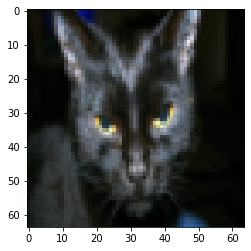

In [160]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

Muchos errores de software en el aprendizaje profundo provienen de tener dimensiones de matrices/vectores que no encajan. Si consigues mantener las dimensiones de las matrices/vectores en orden, conseguirás eliminar muchos errores. 

<a name='ex-1'></a>
### Ejercicio 1
Encuentre los valores para:
    - m_train (número de ejemplos de entrenamiento)
    - m_test (número de ejemplos de prueba)
    - num_px (= altura = anchura de una imagen de entrenamiento)
Recuerda que `train_set_x_orig` es una matriz numpy de forma (m_train, num_px, num_px, 3). Por ejemplo, puede acceder a `m_train` escribiendo `train_set_x_orig.shape[0]`.

In [67]:
#(≈ 3 lines of code)
m_train = 6
m_test = 6
num_px = 6
# YOUR CODE STARTS HERE
m_train = len(train_set_x_orig)
m_test, num_px = test_set_x_orig.shape[:2]


# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**Salida esperada para m_train, m_test y num_px**:
<table style="width:15%">
  <tr>
    <td> m_train </td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>m_test</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>num_px</td>
    <td> 64 </td> 
  </tr>
  
</table>


Por conveniencia, ahora debe remodelar las imágenes de forma (num_px, num_px, 3) en un numpy-array de forma (num_px $*$ num_px $*$ 3, 1). Después de esto, nuestro conjunto de datos de entrenamiento (y prueba) es una matriz numpy donde cada columna representa una imagen aplanada. Debe haber m_train (respectivamente m_test) columnas.

<a name='ex-2'></a>
### Ejercicio 2
Remodelar los conjuntos de datos de entrenamiento y prueba para que las imágenes de tamaño (num_px, num_px, 3) se aplanen en vectores simples de forma (num\_px $*$ num\_px $*$ 3, 1).

Un truco cuando se quiere aplanar una matriz X de forma (a,b,c,d) a una matriz X_flatten de forma (b$*$c$*$d, a) es utilizar 
``python
X_flatten = X.reshape(X.shape[0], -1).T # X.T es la transpuesta de X
```

In [76]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T

In [79]:
# Reshape los ejemplos de entrenamiento y de prueba
#(≈ 2 lines of code)
# train_set_x_flatten = ...
# test_set_x_flatten = ...
# YOUR CODE STARTS HERE
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# YOUR CODE ENDS HERE

# Compruebe que los 10 primeros píxeles de la segunda imagen están en el lugar correcto
assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Solución errónea. Utilice (X.shape[0], -1).T."
assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Solución errónea. Utilice (X.shape[0], -1).T."

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


**Salida esperada**: 

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td> 
  </tr>
</table>

Para representar imágenes en color, hay que especificar los canales rojo, verde y azul (RGB) para cada píxel, por lo que el valor del píxel es en realidad un vector de tres números que van de 0 a 255.

Un paso común de preprocesamiento en el aprendizaje automático es centrar y estandarizar tu conjunto de datos, lo que significa que restas la media de todo el array de numpy de cada ejemplo, y luego divides cada ejemplo por la desviación estándar de todo el array de numpy. Pero para los conjuntos de datos de imágenes, es más simple y más conveniente y funciona casi igual de bien simplemente dividir cada fila del conjunto de datos por 255 (el valor máximo de un canal de píxeles).

<Durante el entrenamiento de tu modelo, vas a multiplicar los pesos y añadir sesgos a algunas entradas iniciales para observar las activaciones de las neuronas. Luego se retropropaga con los gradientes para entrenar el modelo. Pero, es extremadamente importante que cada característica tenga un rango similar para que nuestros gradientes no exploten. Lo verás con más detalle más adelante en las clases. !--> 

Vamos a estandarizar nuestro conjunto de datos.

In [82]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

<font color='blue'>
    
    
**Lo que hay que recordar:**

Los pasos habituales para el preprocesamiento de un nuevo conjunto de datos son
- Averiguar las dimensiones y formas del problema (m_train, m_test, num_px, ...)
- Reformar los conjuntos de datos de manera que cada ejemplo sea ahora un vector de tamaño (num_px \* num_px \* 3, 1)
- Estandarizar los datos

<a name='3'></a>
## 3 - Arquitectura general del algoritmo de aprendizaje ##

Es hora de diseñar un algoritmo sencillo para distinguir las imágenes de gatos de las que no lo son.

Construirás una Regresión Logística, utilizando una mentalidad de Red Neural. La siguiente figura explica por qué **la Regresión Logística es en realidad una Red Neural muy simple**.

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Expresión matemática del algoritmo**:

Por ejemplo $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

El coste se calcula sumando todos los ejemplos de entrenamiento:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Pasos clave**:
En este ejercicio, realizarás los siguientes pasos: 
    - Inicializar los parámetros del modelo
    - Aprender los parámetros del modelo minimizando el coste  
    - Utilizar los parámetros aprendidos para realizar predicciones (en el conjunto de pruebas)
    - Analizar los resultados y concluir.

<a name='4'></a>
## 4 - Construcción de las partes de nuestro algoritmo ## 

Los principales pasos para construir una Red Neuronal son
1. Definir la estructura del modelo (como el número de características de entrada) 
2. Inicializar los parámetros del modelo
3. Bucle:
    - Calcular la pérdida de corriente (propagación hacia delante)
    - Calcular el gradiente actual (propagación hacia atrás)
    - Actualizar los parámetros (descenso de gradiente)

A menudo se construyen 1-3 por separado y se integran en una función que llamamos `modelo()`.
<a name='4-1'></a>
### 4.1 - Funciones de ayuda

<a name='ex-3'></a>
### Ejercicio 3 - sigmoide
Usando tu código de "Python Basics", implementa `sigmoid()`. Como has visto en la figura anterior, necesitas calcular $sigmoide(z) = \frac{1}{1 + e^{-z}}$ para $z = w^T x + b$ para hacer predicciones. Utilice np.exp().

In [113]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE
    s=1/(1+np.exp(-z))
    
    # YOUR CODE ENDS HERE
    
    return s

In [85]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid_test(sigmoid)

sigmoid([0, 2]) = [0.5        0.88079708]
All tests passed!


In [86]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


<a name='4-2'></a>
### 4.2 - Inicialización de los parámetros

<a name='ex-4'></a>
### Ejercicio 4 - inicializar_con_zeros
Implementa la inicialización de los parámetros en la celda de abajo. Tienes que inicializar w como un vector de ceros. Si no sabes qué función de numpy usar, busca np.zeros() en la documentación de la biblioteca Numpy.

In [95]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    w = np.zeros((dim,1))
    b=0.
    # YOUR CODE ENDS HERE

    return w, b

In [96]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

initialize_with_zeros_test_1(initialize_with_zeros)
initialize_with_zeros_test_2(initialize_with_zeros)


w = [[0.]
 [0.]]
b = 0.0
First test passed!
Second test passed!


<a name='4-3'></a>
### 4.3 - Propagación hacia delante y hacia atrás

Ahora que tus parámetros están inicializados, puedes hacer los pasos de propagación "hacia adelante" y "hacia atrás" para aprender los parámetros.

<a name='ex-5'></a>
### Ejercicio 5 - propagar
Implementa una función `propagate()` que calcule la función de coste y su gradiente.

**Sugerencias**:

Propagación hacia delante:
- Usted obtiene X
- Usted calcula $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- Se calcula la función de coste: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Estas son las dos fórmulas que vas a utilizar: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [126]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication. 
    # And don't use loops for the sum.
    # cost = ...                                
    # YOUR CODE STARTS HERE
    # A = sigmoid(np.dot(w.T,X)+b)
    A = sigmoid(w.T@X+b)
    cost = -np.mean(Y*np.log(A)+(1-Y)*np.log(1-A))
    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    # dw = (np.dot(X,(A-Y).T))/m
    dw = (X@(A-Y).T) / m
    db = np.mean(A-Y)
    # YOUR CODE ENDS HERE
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [127]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

propagate_test(propagate)

dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.12500404500439652
cost = 0.15900537707692405
All tests passed!


**Salida esperada**

```
dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405
```

<a name='4-4'></a>
### 4.4 - Optimización
- Ha inicializado sus parámetros.
- También es capaz de calcular una función de coste y su gradiente.
- Ahora, quiere actualizar los parámetros utilizando el descenso de gradiente.


<a name='ex-6'></a>
### Ejercicio 6 - optimizar
Escribe la función de optimización. El objetivo es aprender $w$ y $b$ minimizando la función de coste $J$. Para un parámetro $\theta$, la regla de actualización es $ \theta = \theta - \alpha \text{ } d\theta$, donde $\alpha$ es la tasa de aprendizaje.

In [107]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation 
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        grads, cost = propagate(w, b, X, Y)
        
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        w = w - learning_rate*dw
        b = b - learning_rate*db
        # YOUR CODE ENDS HERE
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [114]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

optimize_test(optimize)

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]
All tests passed!


<a name='ex-7'></a>
### Ejercicio 7 - predecir
La función anterior dará como resultado los valores aprendidos w y b. Podemos utilizar w y b para predecir las etiquetas de un conjunto de datos X. Implementa la función `predict()`. Hay dos pasos para calcular las predicciones:

1. Calcular $\hat{Y} = A = \sigma(w^T X + b)$

2. Convertir las entradas de a en 0 (si la activación <= 0,5) o 1 (si la activación > 0,5), almacena las predicciones en un vector `Y_predicción`. Si lo deseas, puedes utilizar una sentencia `if`/`else` en un bucle `for` (aunque también hay una forma de vectorizar esto). 

In [147]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    # A = sigmoid(np.dot(w.T,X) + b)
    A = sigmoid(w.T@X + b)
    
    # YOUR CODE ENDS HERE
    
    # for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] = 
        # else:
        #     Y_prediction[0,i] = 
        # YOUR CODE STARTS HERE
    Y_prediction = np.round(A)
        
        # YOUR CODE ENDS HERE
    
    return Y_prediction

In [143]:
np.round([[0.72445526, 0.46920652, 0.55395658]])

array([[1., 0., 1.]])

In [146]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predict_test(predict)

predictions = [[1. 1. 0.]]
All tests passed!


<font color='blue'>
    
**Lo que hay que recordar:**
    
Has implementado varias funciones que:
- Inicializan (w,b)
- Optimizar la pérdida iterativamente para aprender los parámetros (w,b):
    - Calcular el coste y su gradiente 
    - Actualizar los parámetros mediante el descenso de gradiente
- Utilizar los parámetros aprendidos (w,b) para predecir las etiquetas de un conjunto dado de ejemplos

<a name='5'></a>
## 5 - Fusionar todas las funciones en un modelo ##

Ahora verás cómo está estructurado el modelo global al juntar todos los bloques de construcción (funciones implementadas en las partes anteriores), en el orden correcto.

<a name='ex-8'></a>
###  Ejercicio 8 - modelo
Implementa la función modelo. Utilice la siguiente notación:
    - Y_predicción_prueba para sus predicciones en el conjunto de prueba
    - Y_predicción_entrenamiento para sus predicciones en el conjunto de entrenamiento
    - parámetros, grados, costes para las salidas de optimize()

In [148]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)   
    # initialize parameters with zeros 
    # w, b = ...
    
    #(≈ 1 line of code)
    # Gradient descent 
    # params, grads, costs = ...
    
    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...
    
    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...
    
    # YOUR CODE STARTS HERE
    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations=num_iterations, learning_rate=learning_rate, print_cost=print_cost)
    w, b = params["w"], params["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # YOUR CODE ENDS HERE

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [149]:
from public_tests import *

model_test(model)

All tests passed!


Si pasa todas las pruebas, ejecute la siguiente celda para entrenar su modelo.

In [151]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


**Comentario: La precisión del entrenamiento se acerca al 100%. Esto es una buena comprobación: su modelo está funcionando y tiene la capacidad suficiente para ajustarse a los datos de entrenamiento. La precisión de la prueba es del 70%. En realidad no está mal para este sencillo modelo, dado el pequeño conjunto de datos que utilizamos y que la regresión logística es un clasificador lineal. Pero no te preocupes, ¡la semana que viene construirás un clasificador aún mejor!

Además, puedes ver que el modelo está claramente sobreajustado a los datos de entrenamiento. Más adelante en esta especialización aprenderás a reducir el sobreajuste, por ejemplo, utilizando la regularización. Usando el código de abajo (y cambiando la variable `index`) puedes ver las predicciones sobre las imágenes del conjunto de prueba.

1

y = 1, you predicted that it is a "non-cat" picture.


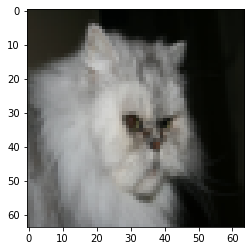

In [163]:
# Example of a picture that was wrongly classified.
index = 10
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

También vamos a trazar la función de coste y los gradientes.

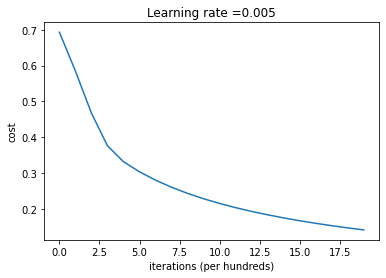

In [153]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

**Interpretación**:
Puedes ver que el coste disminuye. Esto muestra que los parámetros se están aprendiendo. Sin embargo, ves que podrías entrenar el modelo aún más en el conjunto de entrenamiento. Intente aumentar el número de iteraciones en la celda de arriba y vuelva a ejecutar las celdas. Puede ver que la precisión del conjunto de entrenamiento aumenta, pero la precisión del conjunto de prueba disminuye. Esto se llama sobreajuste. 

<a name='6'></a>
## 6 - Análisis posterior (ejercicio opcional) ##

Bien por haber construido su primer modelo de clasificación de imágenes. Vamos a analizarlo más a fondo, y examinar las posibles opciones para la tasa de aprendizaje $\alpha$. 

#### Elección del ritmo de aprendizaje ####

**Recordatorio**:
Para que el Descenso Gradual funcione hay que elegir bien la tasa de aprendizaje. La tasa de aprendizaje $\alpha$ determina la rapidez con la que actualizamos los parámetros. Si la tasa de aprendizaje es demasiado grande podemos "sobrepasar" el valor óptimo. Del mismo modo, si es demasiado pequeña necesitaremos demasiadas iteraciones para converger a los mejores valores. Por eso es crucial utilizar una tasa de aprendizaje bien ajustada.

Comparemos la curva de aprendizaje de nuestro modelo con varias opciones de tasas de aprendizaje. Ejecute la celda de abajo. Esto debería llevar alrededor de 1 minuto. Siéntase libre de probar valores diferentes a los tres que hemos inicializado en la variable "tasas de aprendizaje", y vea lo que sucede. 

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



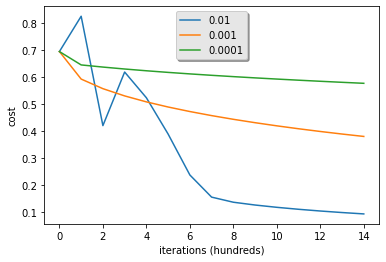

In [164]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretación**: 
- Diferentes tasas de aprendizaje dan diferentes costes y, por tanto, diferentes resultados de predicción.
- Si la tasa de aprendizaje es demasiado grande (0,01), el coste puede oscilar hacia arriba y hacia abajo. Incluso puede divergir (aunque en este ejemplo, el uso de 0,01 sigue siendo un buen valor para el coste). 
- Un coste menor no significa un modelo mejor. Hay que comprobar si existe la posibilidad de sobreajuste. Esto ocurre cuando la precisión del entrenamiento es mucho mayor que la precisión de la prueba.
- En el aprendizaje profundo, solemos recomendar que 
    - Elegir la tasa de aprendizaje que mejor minimice la función de coste.
    - Si tu modelo se sobreajusta, utiliza otras técnicas para reducir el sobreajuste.


<a name='7'></a>
## 7 - Prueba con su propia imagen (ejercicio opcional) ##

Bien por haber terminado esta tarea. Puedes utilizar tu propia imagen y ver el resultado de tu modelo. Para ello

    1. Añade tu imagen al directorio de este Jupyter Notebook, en la carpeta "images"
    2. Cambia el nombre de tu imagen en el siguiente código
    3. Ejecuta el código y comprueba si el algoritmo es correcto (1 = gato, 0 = no gato)

y = 0.0, your algorithm predicts a "non-cat" picture.


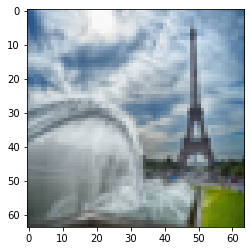

In [169]:
# change this to the name of your image file
my_image = "my_image.jpg"   

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

<font color='blue'>
    
**Lo que hay que recordar de esta tarea:**
1. El preprocesamiento del conjunto de datos es importante.
2. Has implementado cada función por separado: inicializar(), propagar(), optimizar(). Luego has construido un modelo().
3. Ajustar la tasa de aprendizaje (que es un ejemplo de "hiperparámetro") puede suponer una gran diferencia para el algoritmo. Verás más ejemplos de esto más adelante en este curso.

Por último, si quieres, te invitamos a que pruebes diferentes cosas en este Cuaderno. Asegúrate de enviarlo antes de probar cualquier cosa. Una vez que lo envíes, las cosas con las que puedes jugar incluyen
    - Jugar con la tasa de aprendizaje y el número de iteraciones
    - Probar diferentes métodos de inicialización y comparar los resultados
    - Probar otros preprocesamientos (centrar los datos, o dividir cada fila por su desviación estándar)

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c